In [1]:
# add ..\ to path
import sys
sys.path.append('..\\')
from scripts.algo.iterative_phase_estimation import iterative_phase_estimation


In [2]:
import numpy as np
from qiskit_aer import Aer
U = np.array([[1, 0], [0, -1]])
eigenstate = np.array([1, 0])
num_evals = 100

# Run the algorithm. Determine how many times the control qubit was measured to be 0.

# Now, to exectue a qiksit circuit, qe need to specify a few things:
# 1. The backend: this is the simulator or the real quantum computer that will run the circuit
'''service = QiskitRuntimeService()
available_backends = service.backends()
filtered_backends = service.backends(available=True, min_num_qubits=2, simulator=True)
selected_backend = service.least_busy(filtered_backends)'''
# Since I dont have an account, I will use the Aer simulator
selected_backend = Aer.get_backend('qasm_simulator')

# 2. Experiment: this is the circuit that we want to run. It is a QuantumCircuit object
p_0, qc = iterative_phase_estimation(U, num_evals, eigenstate, selected_backend)
print(p_0)


{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
{'0': 1}
1.0


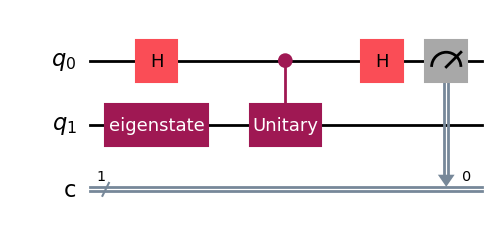

In [3]:
qc.draw('mpl')

In [4]:
# Sexier Hamiltonian: Hubbard model
from qiskit_nature.second_q.operators import FermionicOp

'''A FermionicOp represents a weighted sum of fermionic creation/annihilation operator terms. 
These terms are encoded as sparse labels, which are strings consisting of a space-separated 
list of expressions. Each expression must look like [+-]_<index>, where the <index> is a 
non-negative integer representing the index of the fermionic mode where the + (creation) 
or - (annihilation) operation is to be performed. The value of index is bound by the number of spin orbitals 
(num_spin_orbitals) of the operator '''

# Define the one-body interactions (kinetic term)
t = 1 # hopping term
one_body_interactions = FermionicOp({"+_0 -_1": -t, "+_1 -_0": -t})

# Define the two-body interactions (interaction term)
U = 1 # Coulomb repulsion
two_body_interactions = FermionicOp({"+_0 -_0 +_1 -_1": U})

# Define the Hubbard Hamiltonian
H = one_body_interactions + two_body_interactions
H

FermionicOp({'+_0 -_1': -1, '+_1 -_0': -1, '+_0 -_0 +_1 -_1': 1}, num_spin_orbitals=2, )

In [5]:
# Convert Fermionic hamiltonian to pauli operators using the Jordan-Wigner transformation
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

qubit_op = mapper.map(H)

qubit_op

SparsePauliOp(['YY', 'XX', 'II', 'ZI', 'IZ', 'ZZ'],
              coeffs=[-0.5 +0.j, -0.5 +0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])

In [6]:
# Run the Iterative Phase Estimation algorithm with the Hubbard Hamiltonian
import numpy as np
num_evals = 10
eigenstate = np.array([1, 0, 0, 0])
p_0, qc = iterative_phase_estimation(qubit_op, num_evals, eigenstate, selected_backend, num_qubits=2)
print(p_0)

ValueError: Input matrix is not unitary.

In [8]:
# New plan: Come up with a Hamiltonian that is easier to simulate.
# Try idk XX or something.
from qiskit.quantum_info import Operator, SparsePauliOp
XX = Operator.from_label('XX')
U = XX

num_evals = 10
eigenstate = np.array([1, 0, 0, 0])
p_0, qc = iterative_phase_estimation(U, num_evals, eigenstate, selected_backend, num_qubits=2)
print(p_0)

{'0': 1}
{'0': 1}
{'0': 1}
{'1': 1}
{'0': 1}
{'0': 1}
{'1': 1}
{'0': 1}
{'0': 1}
{'0': 1}
0.8


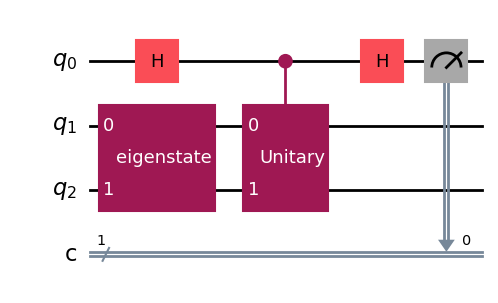

In [9]:
qc.draw('mpl')